In [73]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [74]:
df = pd.read_csv('ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Data Inspection

In [75]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [76]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [77]:
df.shape

(2111, 17)

In [78]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [79]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [80]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [82]:
for i in df.columns:
    print(df[i].unique())
    print("*"*100)
    print(df[i].value_counts())
    print("*"*100)

['Female' 'Male']
****************************************************************************************************
Gender
Male      1068
Female    1043
Name: count, dtype: int64
****************************************************************************************************
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
****************************************************************************************************
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
21.680123      1
24.469756      1
25.127910      1
25.986368      1
23.761970      1
Name: count, Length: 1402, dtype: int64
****************************************************************************************************
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
****************************************************************************************************
Height
1.700000    60
1.650000    50
1.600000    43
1.750

Data Cleaning

In [83]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [84]:
df.isna().sum()/len(df)*100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [86]:
cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for i in cols:
    print(df[i].unique(), i)
    print('*'*43)

['Female' 'Male'] Gender
*******************************************
['yes' 'no'] family_history_with_overweight
*******************************************
['no' 'yes'] FAVC
*******************************************
['Sometimes' 'Frequently' 'Always' 'no'] CAEC
*******************************************
['no' 'yes'] SMOKE
*******************************************
['no' 'yes'] SCC
*******************************************
['no' 'Sometimes' 'Frequently' 'Always'] CALC
*******************************************
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] MTRANS
*******************************************
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] NObeyesdad
*******************************************


In [87]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


Data Preprocessing

Encode Categorical Variables


Identify categorical columns

In [88]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]


In [89]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns


In [90]:
# Target
le_target = LabelEncoder()
df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'])

In [91]:
# Binary columns
binary_cols = [
    'Gender',
    'family_history_with_overweight',
    'FAVC',
    'SMOKE',
    'SCC'
]

for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [92]:
# One-hot encoding for remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

Visualization (EDA)

Target distribution

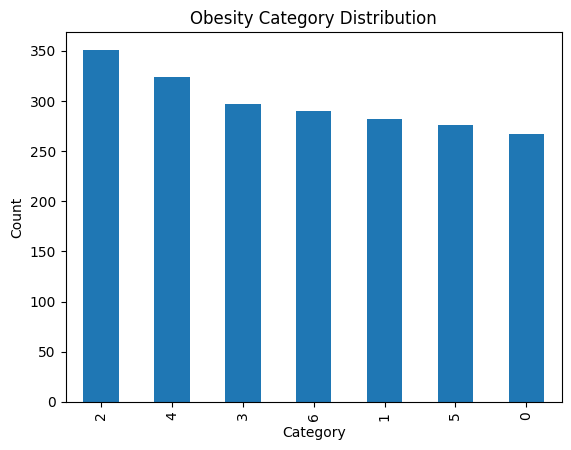

In [93]:
import matplotlib.pyplot as plt

plt.figure()
df["NObeyesdad"].value_counts().plot(kind="bar")
plt.title("Obesity Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


Age vs Weight

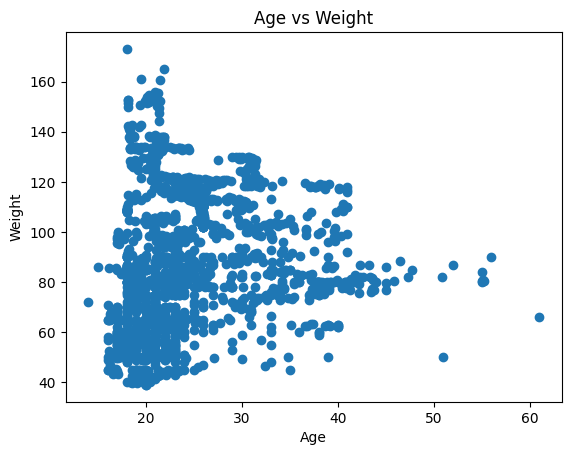

In [94]:
plt.figure()
plt.scatter(df["Age"], df["Weight"])
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("Age vs Weight")
plt.show()


Gender distribution

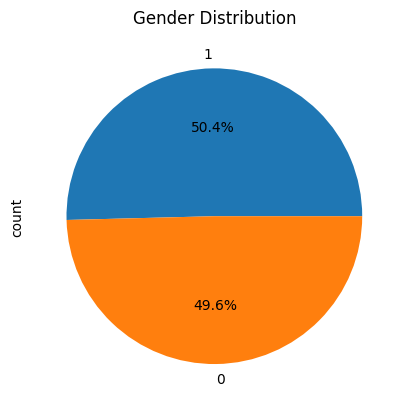

In [95]:
df["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()


Physical Activity vs Obesity

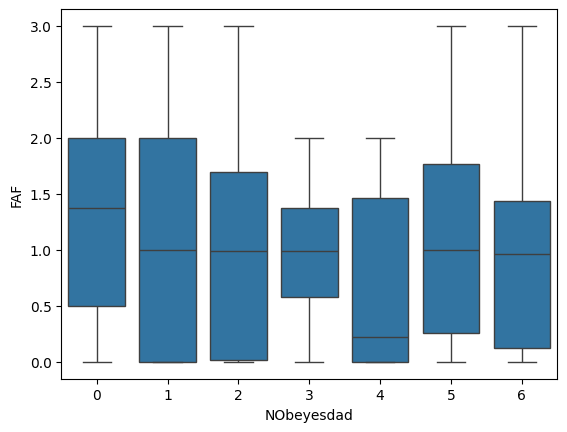

In [96]:
plt.figure()
sns.boxplot(x='NObeyesdad', y='FAF', data=df)
plt.show()


In [97]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


In [98]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Model Building

Models Used:

1.Logistic Regression

2.KNN

3.Decision Tree

4.Random Forest

5.Support Vector Machine

In [100]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
accuracy_score(y_test, y_pred_lr)


0.8923444976076556

In [101]:
from sklearn.neighbors import KNeighborsClassifier

param_knn = {'n_neighbors':[3,5,7,9]}

knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred_knn)


0.80622009569378

In [102]:
from sklearn.tree import DecisionTreeClassifier

param_dt = {
    'max_depth':[None,5,10,20],
    'min_samples_split':[2,5,10]
}

dt = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)


0.930622009569378

In [103]:
from sklearn.ensemble import RandomForestClassifier

param_rf = {
    'n_estimators':[100,200],
    'max_depth':[None,10,20]
}

rf = GridSearchCV(RandomForestClassifier(), param_rf, cv=5)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)


0.9473684210526315

In [104]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)
accuracy_score(y_test, y_pred_svc)


0.861244019138756

Evaluation

In [105]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.78      0.93      0.85        57
           2       1.00      0.96      0.98        70
           3       1.00      1.00      1.00        60
           4       1.00      0.98      0.99        65
           5       0.92      0.87      0.90        55
           6       0.95      0.91      0.93        58

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [106]:
confusion_matrix(y_test, y_pred_rf)


array([[51,  2,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  2,  2],
       [ 0,  2, 67,  0,  0,  0,  1],
       [ 0,  0,  0, 60,  0,  0,  0],
       [ 0,  1,  0,  0, 64,  0,  0],
       [ 0,  7,  0,  0,  0, 48,  0],
       [ 0,  3,  0,  0,  0,  2, 53]])

Compare All Models

In [107]:
from sklearn.metrics import accuracy_score

model_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svc)
}

model_comparison = pd.DataFrame(
    model_scores.items(),
    columns=["Model", "Accuracy"]
).sort_values(by="Accuracy", ascending=False)

model_comparison


,Model,Accuracy
3,Random Forest,0.947368
2,Decision Tree,0.930622
0,Logistic Regression,0.892344
4,SVM,0.861244
1,KNN,0.806220


In [108]:
best_model_name = model_comparison.iloc[0]['Model']
best_model_name


'Random Forest'

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_rf_final = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_final = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_rf_final,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_final.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold 

In [110]:
# Best Parameters
rf_final.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

Final Model Evaluation

In [111]:
best_rf = rf_final.best_estimator_

y_pred_final = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))
confusion_matrix(y_test, y_pred_final)


Accuracy: 0.9497607655502392
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.81      0.95      0.87        57
           2       1.00      0.96      0.98        70
           3       1.00      1.00      1.00        60
           4       1.00      0.98      0.99        65
           5       0.91      0.87      0.89        55
           6       0.95      0.93      0.94        58

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



array([[50,  3,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  3,  0],
       [ 0,  1, 67,  0,  0,  0,  2],
       [ 0,  0,  0, 60,  0,  0,  0],
       [ 0,  1,  0,  0, 64,  0,  0],
       [ 0,  6,  0,  0,  0, 48,  1],
       [ 0,  2,  0,  0,  0,  2, 54]])

Final Prediction

In [112]:
sample = X.iloc[[0]]
sample_scaled = scaler.transform(sample)

pred = best_rf.predict(sample)
le_target.inverse_transform(pred)


array(['Normal_Weight'], dtype=object)

Save Best Model & Preprocessors

In [113]:
import pickle

pickle.dump(best_rf, open("obesity_model.sav", "wb"))
pickle.dump(scaler, open("scaler.sav", "wb"))
pickle.dump(le_target, open("label_encoder.sav", "wb"))


In [114]:
# Save feature names
feature_names = X.columns.tolist()

import pickle
pickle.dump(feature_names, open("features.sav", "wb"))


In [115]:
X = df.drop('NObeyesdad', axis=1)

with open("columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)


In [116]:
columns = pickle.load(open("columns.pkl", "rb"))


In [117]:
input_data = pd.DataFrame(0, index=[0], columns=columns)


In [118]:
input_data['Age'] = 'age'
input_data['Height'] = 'height'
input_data['Weight'] = 'weight'


In [120]:
import streamlit as st
import pandas as pd
import pickle
import numpy as np

# Load model & preprocessors
model = pickle.load(open("obesity_model.sav", "rb"))
scaler = pickle.load(open("scaler.sav", "rb"))
columns = pickle.load(open("columns.pkl", "rb"))

st.set_page_config(page_title="Obesity Prediction", layout="centered")
st.title("🍔 Obesity Prediction App")

# ---------------- User Inputs ----------------
age = st.slider("Age", 10, 80, 25)
height = st.number_input("Height (m)", 1.0, 2.5, 1.7)
weight = st.number_input("Weight (kg)", 30.0, 200.0, 70.0)

CAEC = st.selectbox(
    "Consumption of food between meals (CAEC)",
    ["no", "Sometimes", "Frequently", "Always"]
)

CALC = st.selectbox(
    "Alcohol consumption (CALC)",
    ["no", "Sometimes", "Frequently", "Always"]
)

# ---------------- Encoding (MUST MATCH TRAINING) ----------------
caec_map = {
    "no": 0,
    "Sometimes": 1,
    "Frequently": 2,
    "Always": 3
}

calc_map = {
    "no": 0,
    "Sometimes": 1,
    "Frequently": 2,
    "Always": 3
}

CAEC = caec_map[CAEC]
CALC = calc_map[CALC]

# ---------------- Create Input Data ----------------
input_dict = {
    "Age": age,
    "Height": height,
    "Weight": weight,
    "CAEC": CAEC,
    "CALC": CALC
}

# Create full feature row with zeros
input_data = pd.DataFrame(
    np.zeros((1, len(columns))),
    columns=columns
)

# Fill only known inputs
for key in input_dict:
    if key in input_data.columns:
        input_data[key] = input_dict[key]

# ---------------- Prediction ----------------
if st.button("Predict Obesity Level"):
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    st.success(f"Predicted Obesity Level: {prediction[0]}")


2026-01-09 21:51:08.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 21:51:08.613 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 21:51:08.613 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 21:51:08.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 21:51:08.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 21:51:08.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 21:51:08.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-09 21:51:08.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [121]:
# input_scaled = scaler.transform(input_data)
# prediction = model.predict(input_scaled)
input_scaled = pd.DataFrame(
    scaler.transform(input_data),
    columns=columns
)

prediction = model.predict(input_scaled)
